In [40]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import statistics
dir_path = "/home/eric/Desktop/majority_v_ensemble2/"

mcu_net_images = []
mcu_net_fn = []

mrcnn_images = []
mrcnn_fn = []


gmrcnn_images = []
gmrcnn_fn = []

# Loop through fold1 to fold4
for i in range(1, 5):
    fold_mcunet = []
    fold_mcunet_fn = []
    
    fold_mrcnn = []
    fold_mrcnn_fn = []
    
    fold_gmrcnn = []
    fold_gmrcnn_fn = []
    
    fold_path = os.path.join(dir_path, f'fold{i}')
    
    if not os.path.exists(fold_path):
        continue
    
    all_filenames = sorted([f for f in os.listdir(fold_path) if f.endswith('.png')])
    
    for filename in all_filenames:
        if filename.endswith('.png'):
            img_path = os.path.join(fold_path, filename)
            image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if image is None:
                continue  # Skip unreadable images
            if filename.startswith('N'):
                fold_mcunet.append(image)
                fold_mcunet_fn.append(filename)
            elif filename.startswith('M'):
                fold_mrcnn.append(image)
                fold_mrcnn_fn.append(filename)
            elif filename.startswith('G'):
                fold_gmrcnn.append(image)
                fold_gmrcnn_fn.append(filename)
    
    mcu_net_images.append(fold_mcunet)
    mcu_net_fn.append(fold_mcunet_fn)
    
    mrcnn_images.append(fold_mrcnn)
    mrcnn_fn.append(fold_mrcnn_fn)
    
    gmrcnn_images.append(fold_gmrcnn)
    gmrcnn_fn.append(fold_gmrcnn_fn)

# Now n_images and m_images contain the loaded cv2 images
print(f'Total N images: {len(mcu_net_images)}')
print(f'Total M images: {len(mcu_net_fn)}')
print(mcu_net_fn)

print(f'Total N images: {len(mrcnn_images)}')
print(f'Total M images: {len(mrcnn_fn)}')
print(mrcnn_fn)
print(f'Total N images: {len(gmrcnn_images)}')
print(f'Total M images: {len(gmrcnn_fn)}')
print(gmrcnn_fn)



Total N images: 4
Total M images: 4
[['N1-2.png', 'N1-4.png', 'N1-6.png', 'N2-1.png', 'N2-2.png', 'N3-2.png', 'N3-3.png', 'N3-9.png', 'N4-1.png', 'N4-6.png', 'N5-1.png', 'N5-6.png'], ['N1-3.png', 'N1-8.png', 'N1-9.png', 'N2-10.png', 'N2-5.png', 'N3-10.png', 'N3-6.png', 'N3-7.png', 'N4-4.png', 'N4-7.png', 'N5-3.png'], ['N1-10.png', 'N1-5.png', 'N2-4.png', 'N2-6.png', 'N2-9.png', 'N3-4.png', 'N3-8.png', 'N4-3.png', 'N4-8.png', 'N4-9.png', 'N5-5.png'], ['N1-1.png', 'N1-7.png', 'N2-3.png', 'N2-7.png', 'N2-8.png', 'N3-1.png', 'N3-5.png', 'N4-2.png', 'N4-5.png', 'N5-2.png', 'N5-4.png']]
Total N images: 4
Total M images: 4
[['MN1-2.png', 'MN1-4.png', 'MN1-6.png', 'MN2-1.png', 'MN2-2.png', 'MN3-2.png', 'MN3-3.png', 'MN3-9.png', 'MN4-1.png', 'MN4-6.png', 'MN5-1.png', 'MN5-6.png'], ['MN1-3.png', 'MN1-8.png', 'MN1-9.png', 'MN2-10.png', 'MN2-5.png', 'MN3-10.png', 'MN3-6.png', 'MN3-7.png', 'MN4-4.png', 'MN4-7.png', 'MN5-3.png'], ['MN1-10.png', 'MN1-5.png', 'MN2-4.png', 'MN2-6.png', 'MN2-9.png', 'MN

In [41]:
def file_names_with_prefix(directory_path, prefix):

    # Initialize an empty list to store the file names without extensions
    file_names_without_extension = []

    # Loop through all files in the specified directory
    for filename in os.listdir(directory_path):
        #Checking if the file in loop exists in the directory_path not sure how is this necessary
        #??
        if os.path.isfile(os.path.join(directory_path, filename)):
            # Check if the file name starts with the specified prefix
            if filename.startswith(prefix):
                # Get the file name without extension
                name_without_extension, _ = os.path.splitext(filename)

                # Append the file name (without extension) to the list
                file_names_without_extension.append(name_without_extension)

    # Sort the list of file names without extensions in ascending order
    sorted_file_names = sorted(
        file_names_without_extension,
        key=lambda x: (x.split('-')[0], int(x.split('-')[1]))
    )  # Modify this part based on your file naming convention

    # Now you have a sorted list of file names with the specified prefix and without extensions
    return sorted_file_names

In [42]:
labeled_dir = str("/home/eric/Documents/cervicalResearchIIP/img_1006t/labeled")
def cal_DiceMulitple(dir, input_name):
    # change the label count as your preference
    Dice = [0] * 11
    Count1 = [0] * 11 #予測結果の各ラベルの要素数
    Count2 = [0] * 11 #ラベル画像の
    Count3 = [0] * 11 #正解した画素数
    
    for index in range(len(input_name)):
        print('index = ', index)

        img1 = cv2.imread(dir + '/' + input_name[index] + ".png", cv2.IMREAD_GRAYSCALE)
        img2 = cv2.imread(labeled_dir + '/' + input_name[index] + ".png", cv2.IMREAD_GRAYSCALE)
        #_, img2 = cv2.threshold(img2, 0, 255, cv2.THRESH_BINARY)
        print("予測画像:", dir  + '/' + input_name[index] + ".png")
        print("テストラベル:", labeled_dir + '/' + input_name[index] + ".png")
        unique_label1 = np.unique(img1)
        unique_label2 = np.unique(img2)
        # print(unique_label1)
        # print(unique_label2)
        # change the image array size to your need
        for n in range(256):
            for l in range(256):
                value1 = img1[n,l]
                # for index, uq_value in enumerate(unique_label1):
                #     if(value1 == uq_value):
                #         value1 = index

                Count1[value1] += 1

                value2 = img2[n,l]
                Count2[value2] += 1                    

                if(value1 == value2):
                    Count3[value1] += 1 
    for i in range(11):
        if(Count1[i]+Count2[i] != 0):
            Dice[i] = (2*Count3[i])/(Count1[i] + Count2[i])
        if(Count1[i]+Count2[i] == 0):
            print("")
            #print("4 label case:" + str(input_name[index]))
    Dice.append(statistics.mean(Dice[1:]))
    print('Count1 = ', Count1)
    print('Count2 = ', Count2)
    print('Count3 = ', Count3)
    print('Dice = ', Dice)
    #print(unique_label)

    return Dice

In [43]:
labeled_dir = str("/home/eric/Documents/cervicalResearchIIP/img_1006t/labeled")
def cal_DiceMulitpleAlt(img1, input_name):
    # change the label count as your preference
    Dice = [0] * 11
    Count1 = [0] * 11 #予測結果の各ラベルの要素数
    Count2 = [0] * 11 #ラベル画像の
    Count3 = [0] * 11 #正解した画素数
    
    for index in range(len(input_name)):
        #print('index = ', index)

        img2 = cv2.imread(labeled_dir + '/' + input_name[index] + ".png", cv2.IMREAD_GRAYSCALE)
        #_, img2 = cv2.threshold(img2, 0, 255, cv2.THRESH_BINARY)
        #print("予測画像:", dir  + '/' + input_name[index] + ".png")
        #print("テストラベル:", labeled_dir + '/' + input_name[index] + ".png")
        unique_label1 = np.unique(img1)
        unique_label2 = np.unique(img2)
        # print(unique_label1)
        # print(unique_label2)
        # change the image array size to your need
        for n in range(256):
            for l in range(256):
                value1 = img1[n,l]
                # for index, uq_value in enumerate(unique_label1):
                #     if(value1 == uq_value):
                #         value1 = index

                Count1[value1] += 1

                value2 = img2[n,l]
                Count2[value2] += 1                    

                if(value1 == value2):
                    Count3[value1] += 1 
    for i in range(11):
        if(Count1[i]+Count2[i] != 0):
            Dice[i] = (2*Count3[i])/(Count1[i] + Count2[i])
        if(Count1[i]+Count2[i] == 0):
            print("")
            #print("4 label case:" + str(input_name[index]))
    Dice.append(statistics.mean(Dice[1:]))
    #print('Count1 = ', Count1)
    #print('Count2 = ', Count2)
    #print('Count3 = ', Count3)
    #print('Dice = ', Dice)
    #print(unique_label)

    return Dice

In [44]:

#binary class gets 256x256 two masks containing either 0 or class_number
#ensembles them
def ensemble(s_u, s_m, s_gm):
    ## final combination mask init
    combination_mask = np.zeros((256, 256), dtype = np.int8)  
    for y in range(256):
        for x in range(256):
            px_value = np.array([s_u[y, x], s_m[y, x], s_gm[y, x]])
            majority_value = np.bincount(px_value).argmax()
            combination_mask[y, x] = majority_value
            
    return combination_mask

************Ensemble************


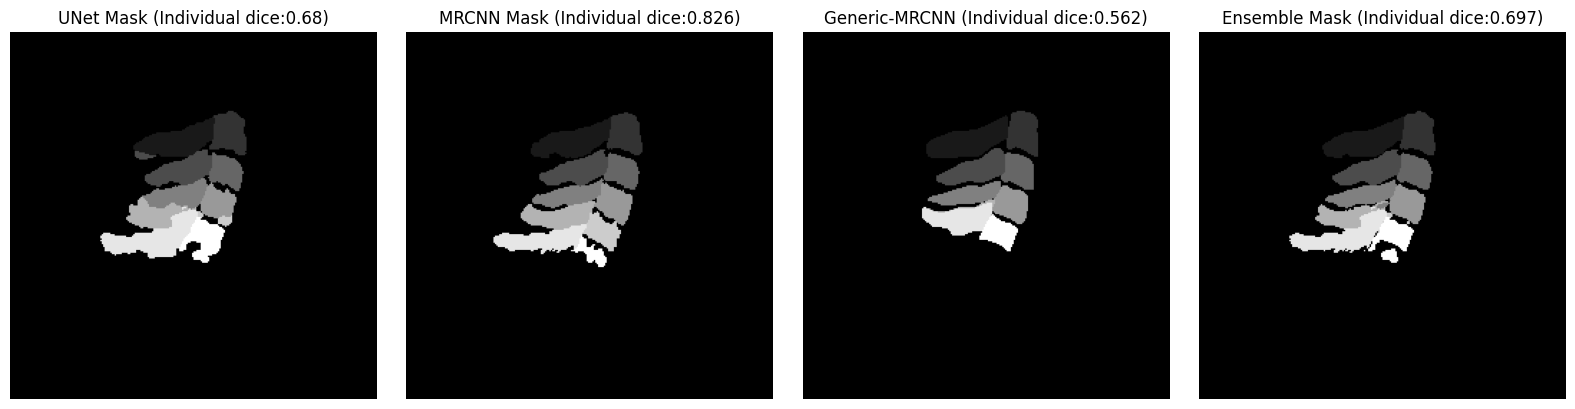

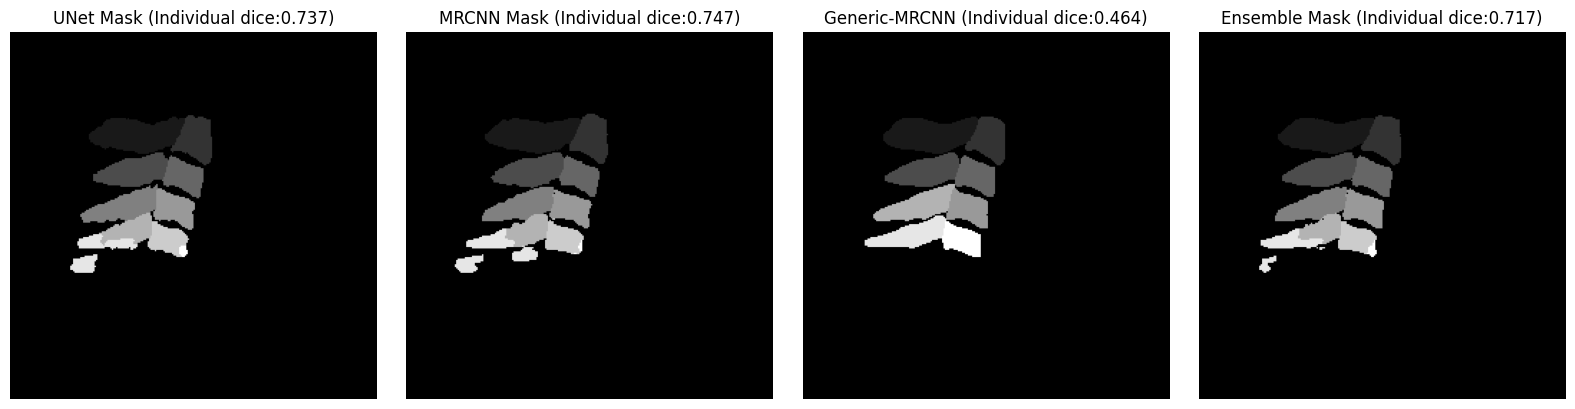

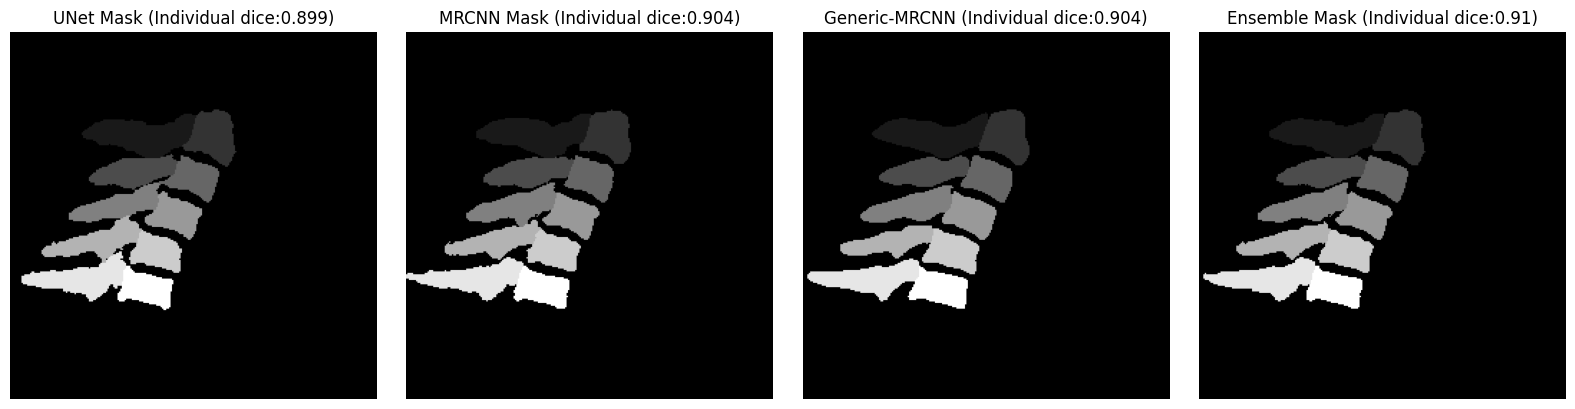

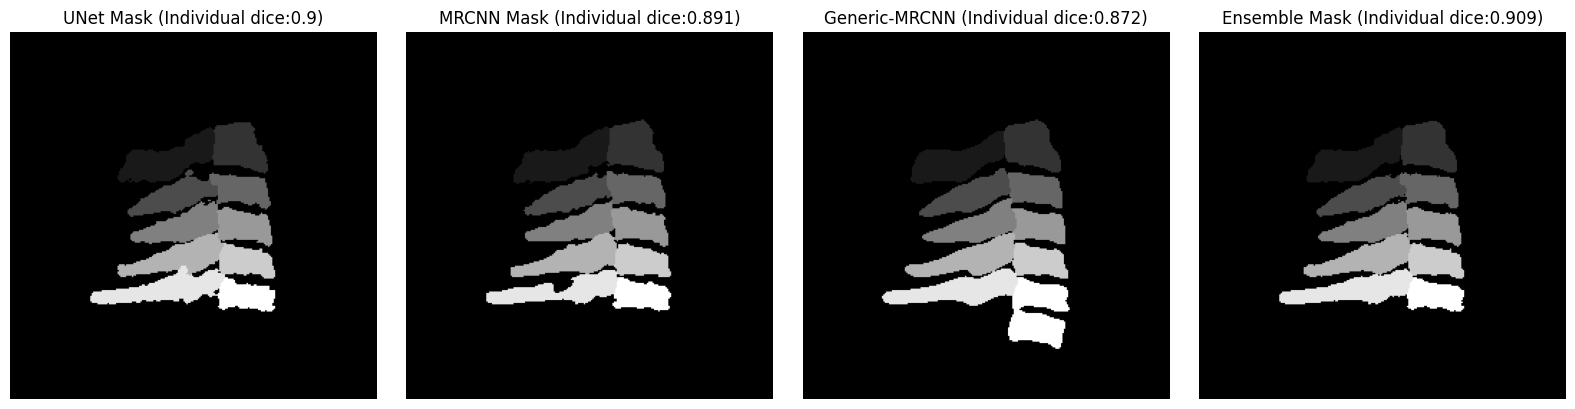

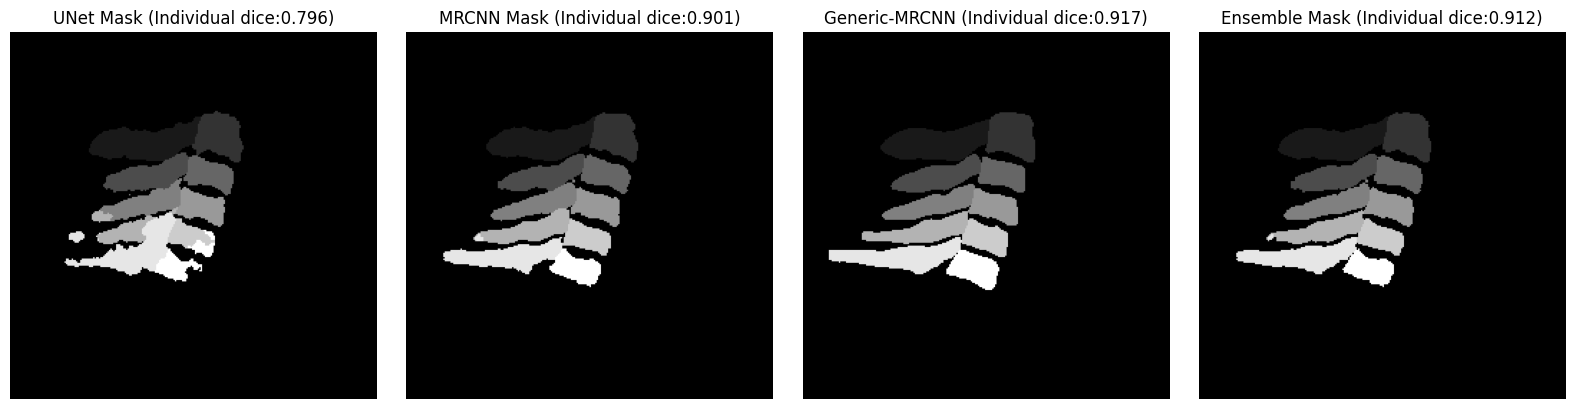

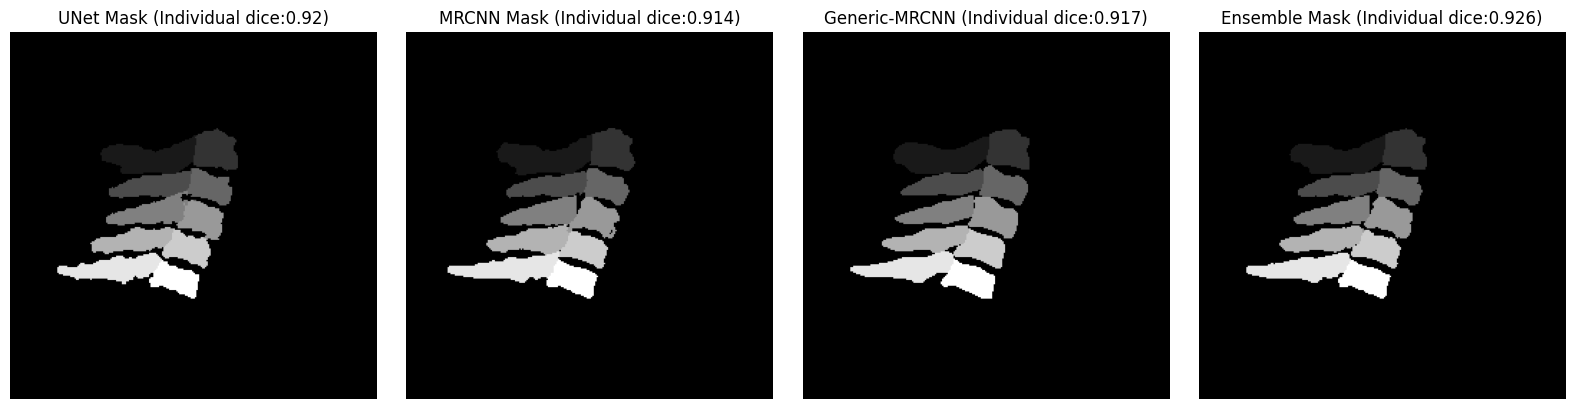

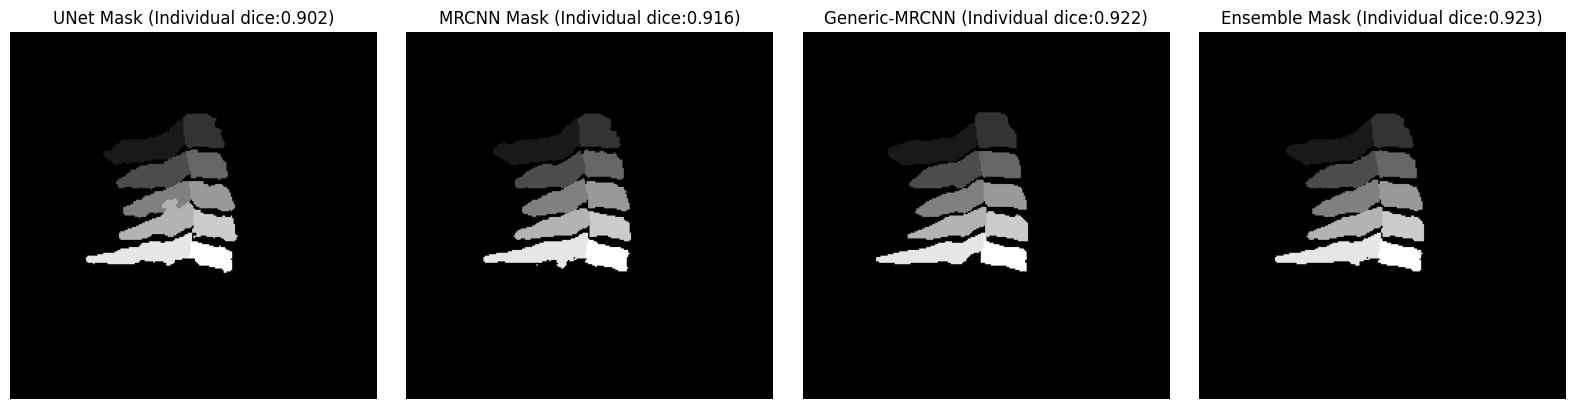

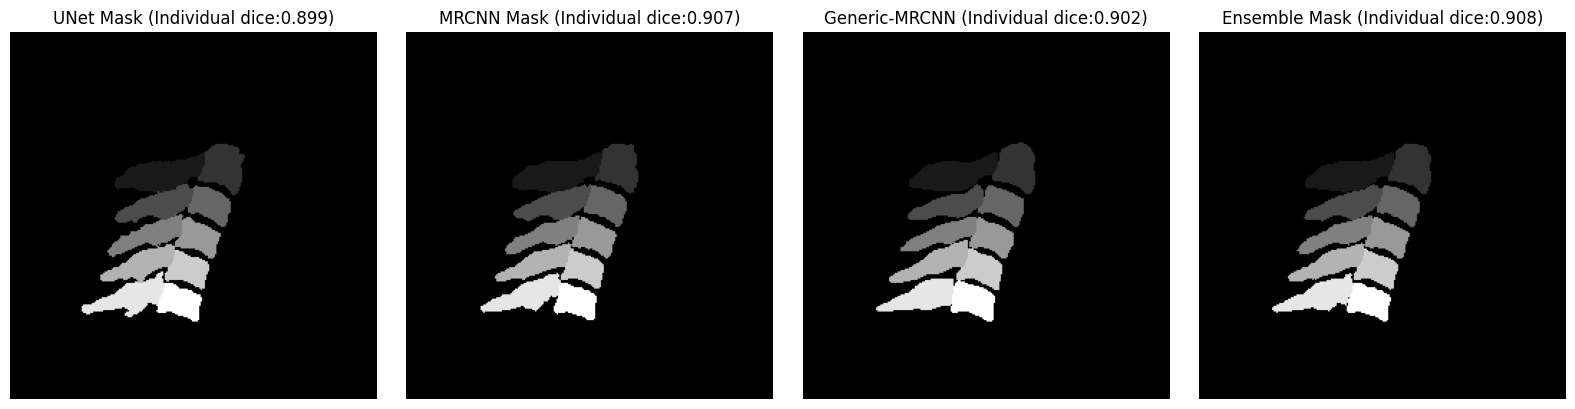

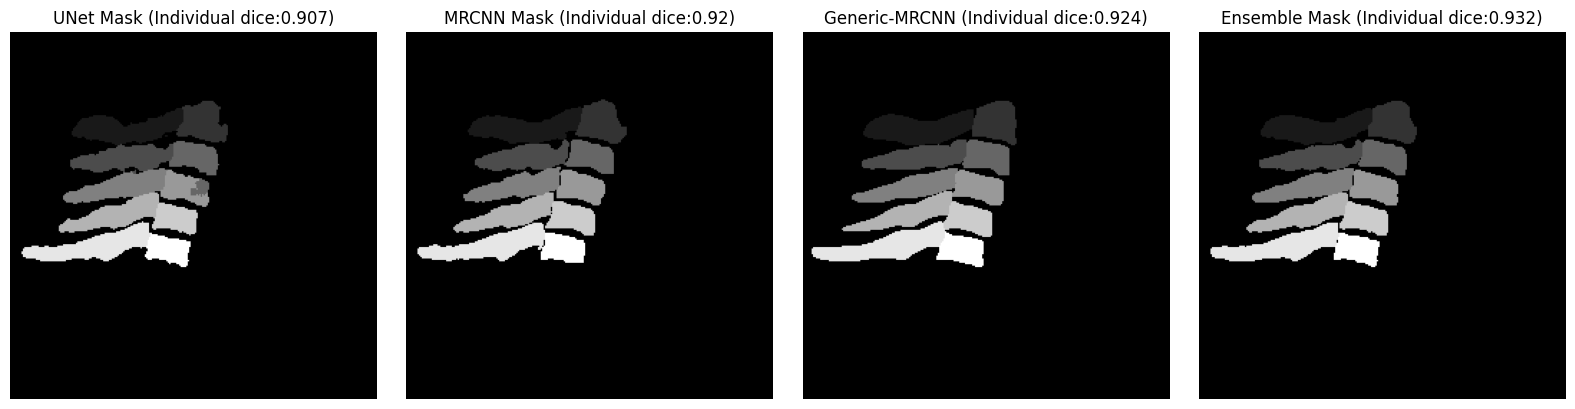

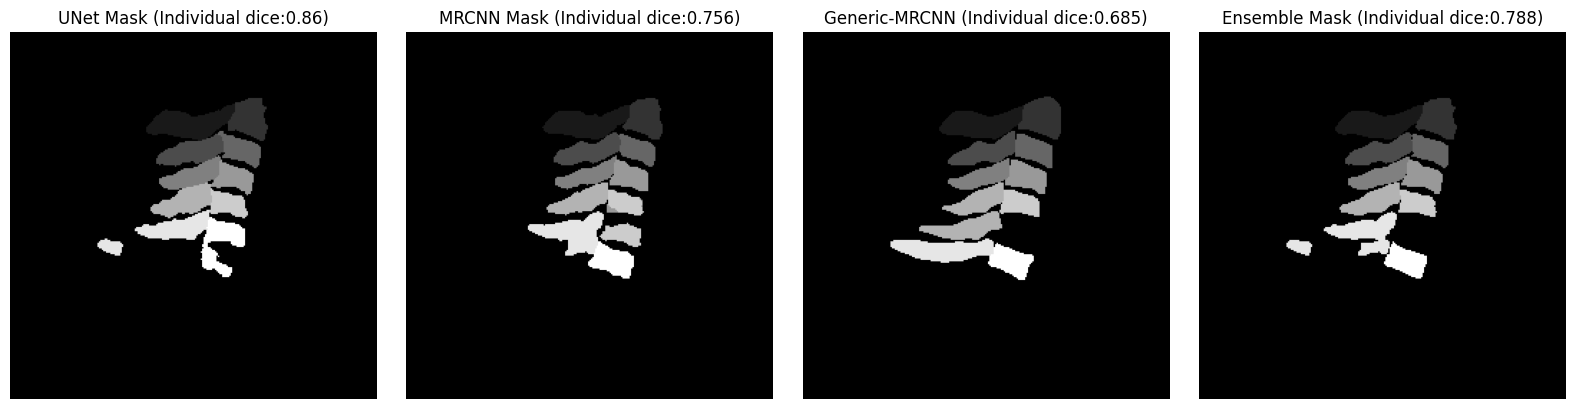

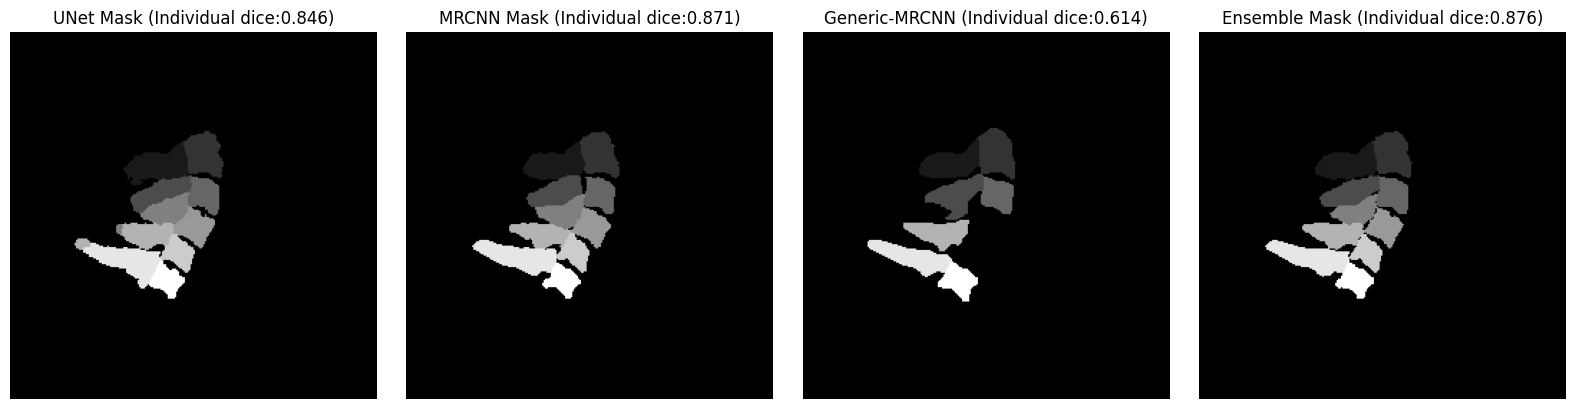

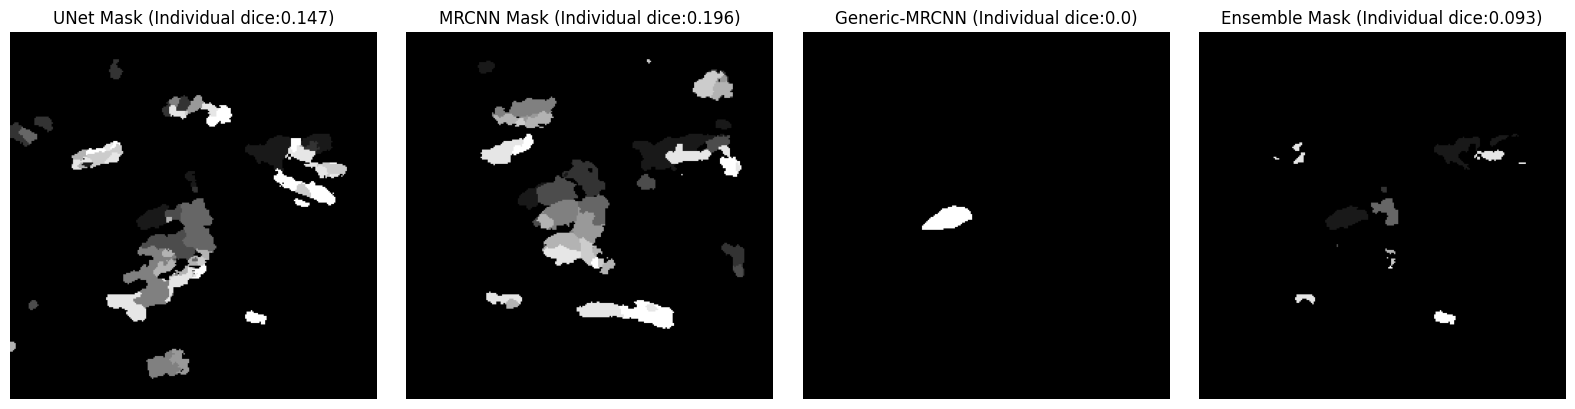

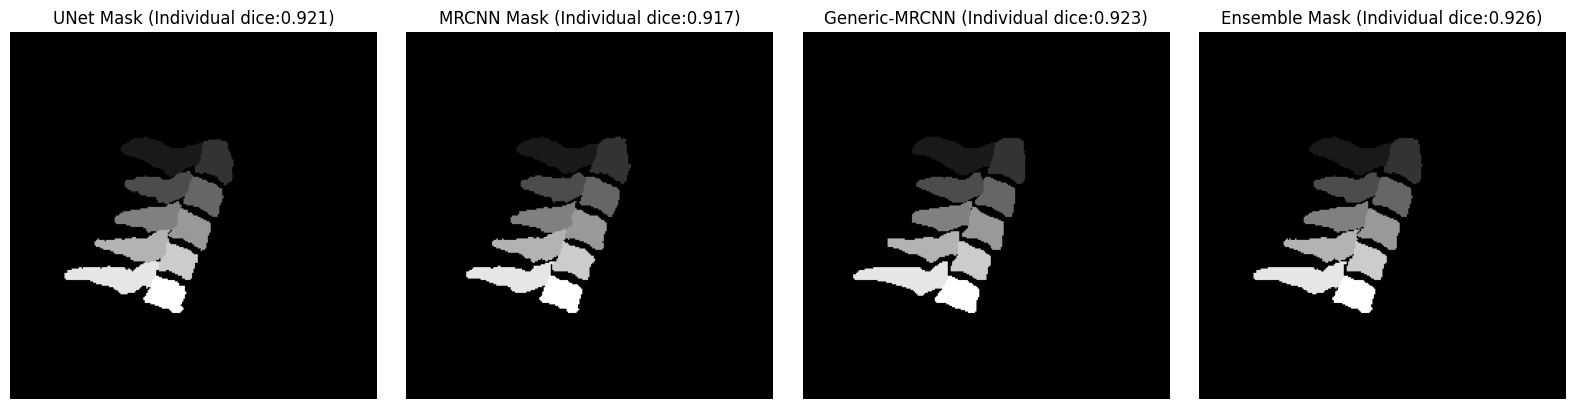

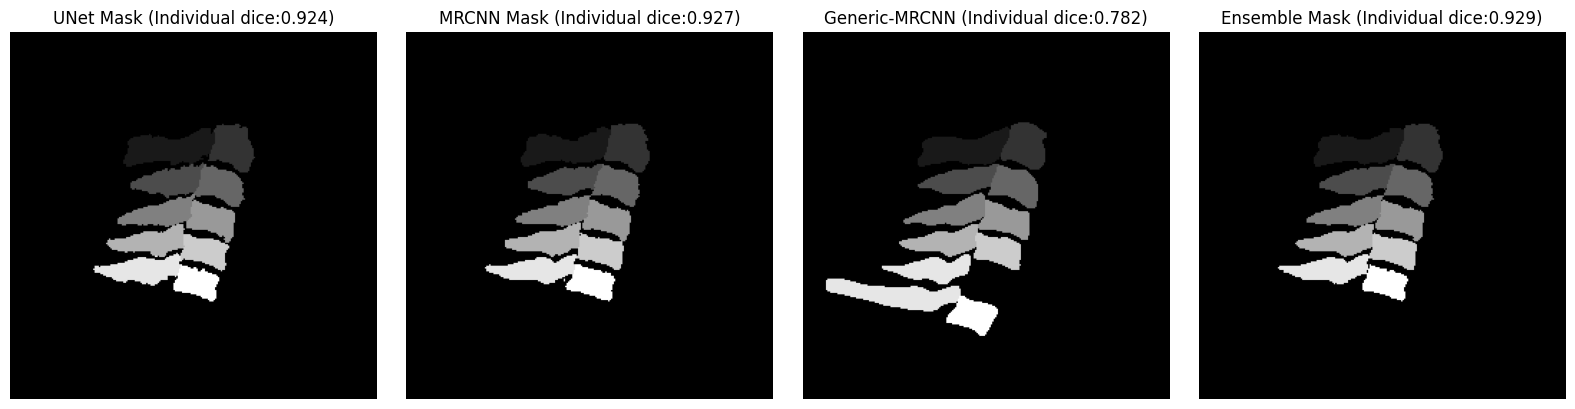

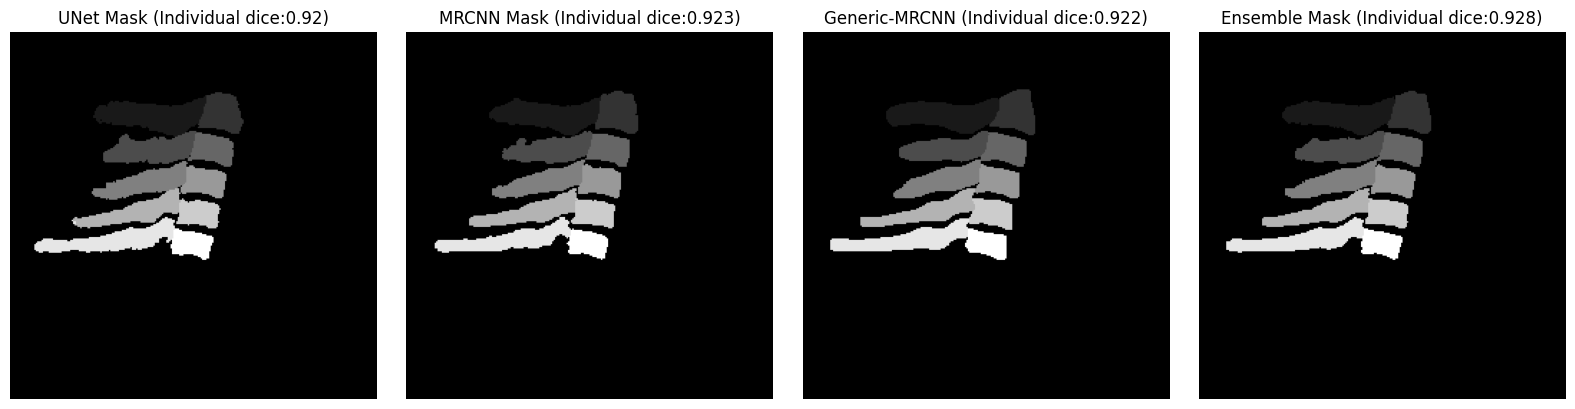

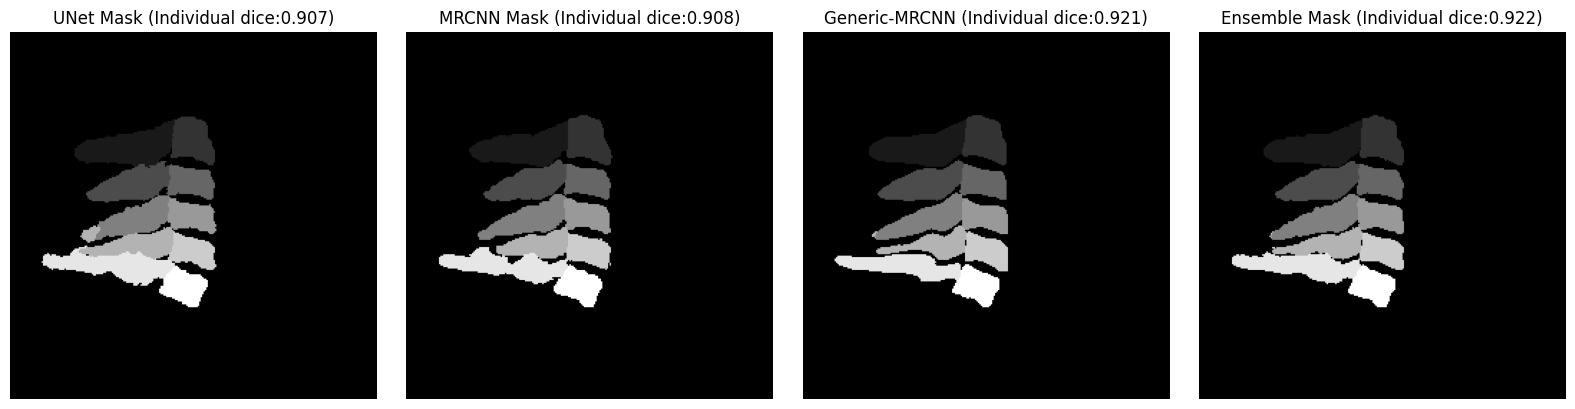

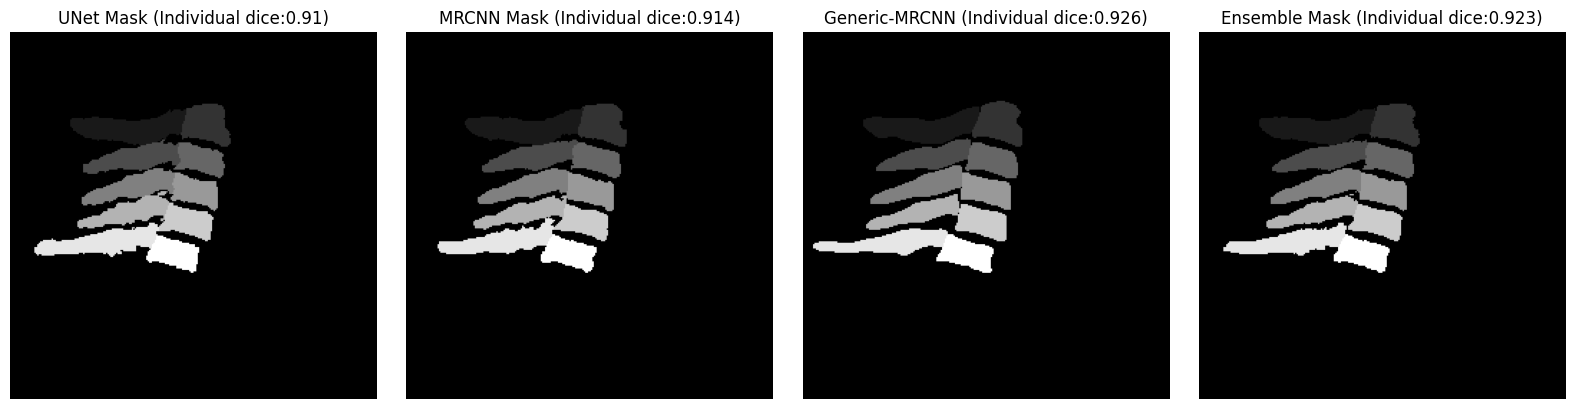

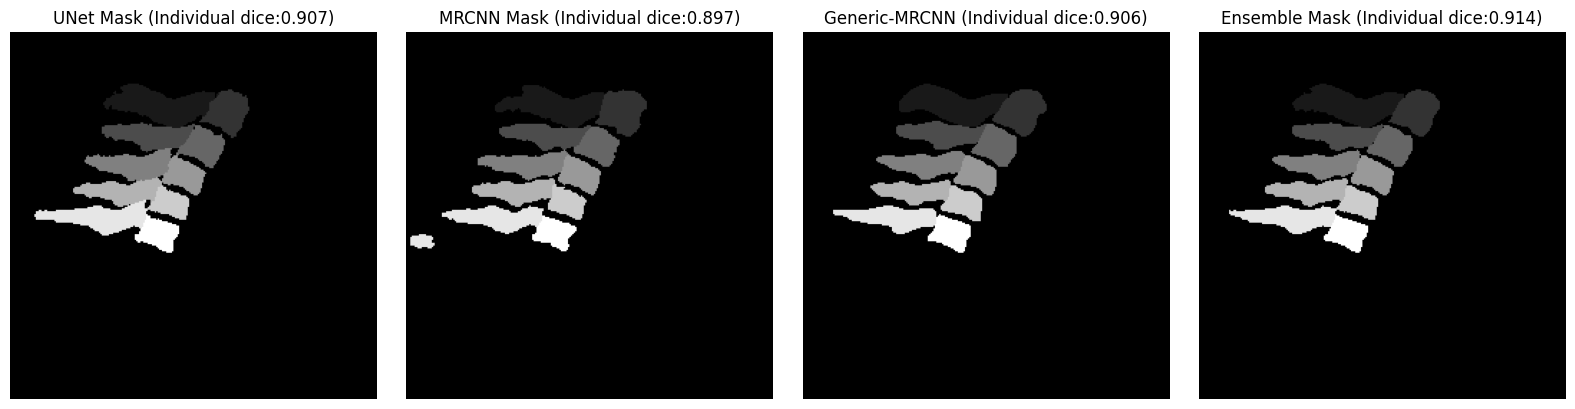

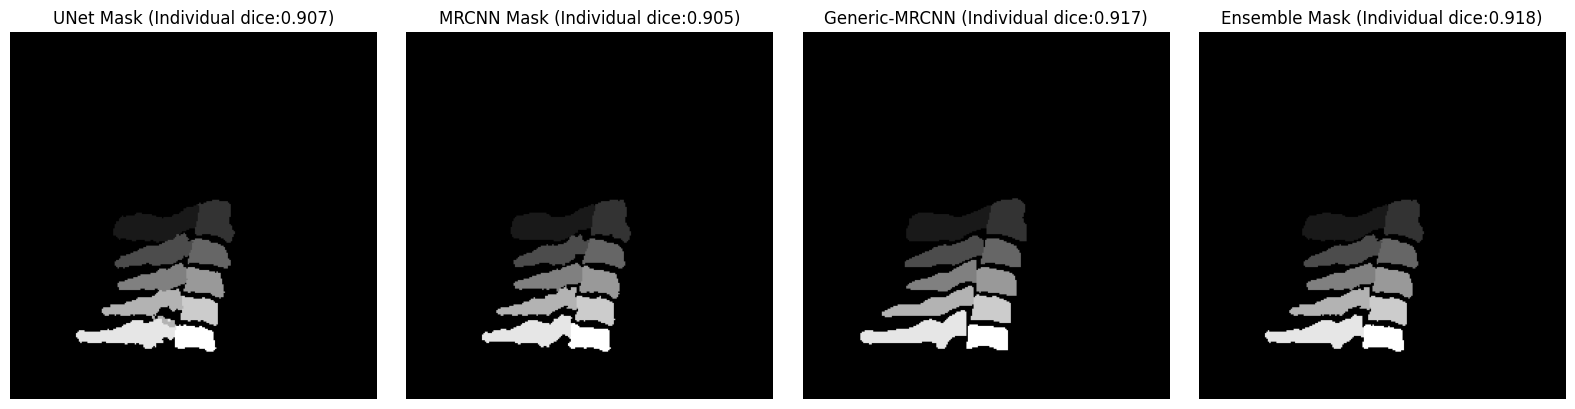

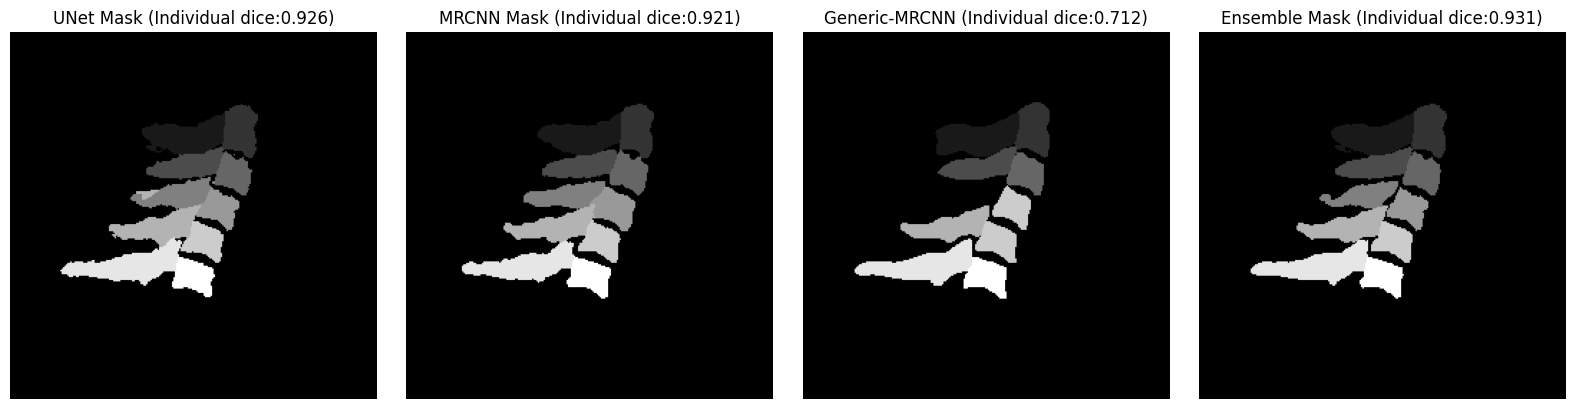

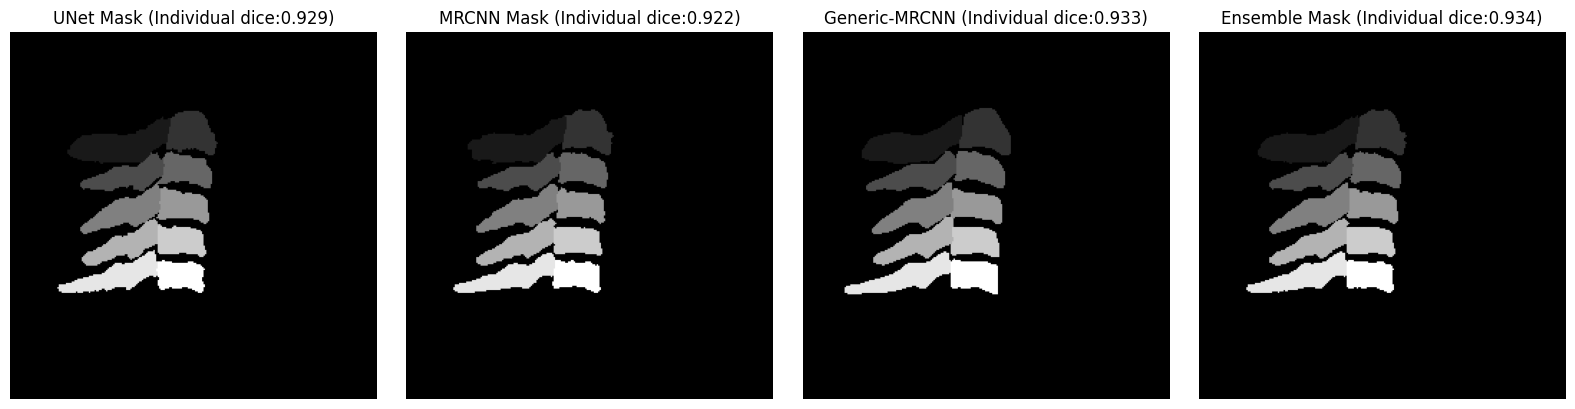

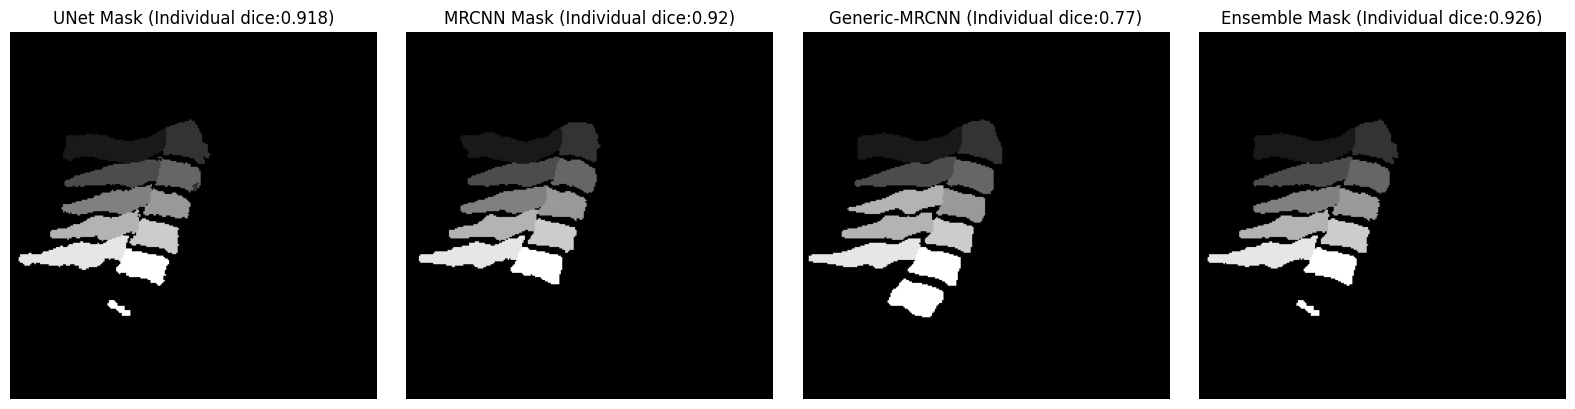

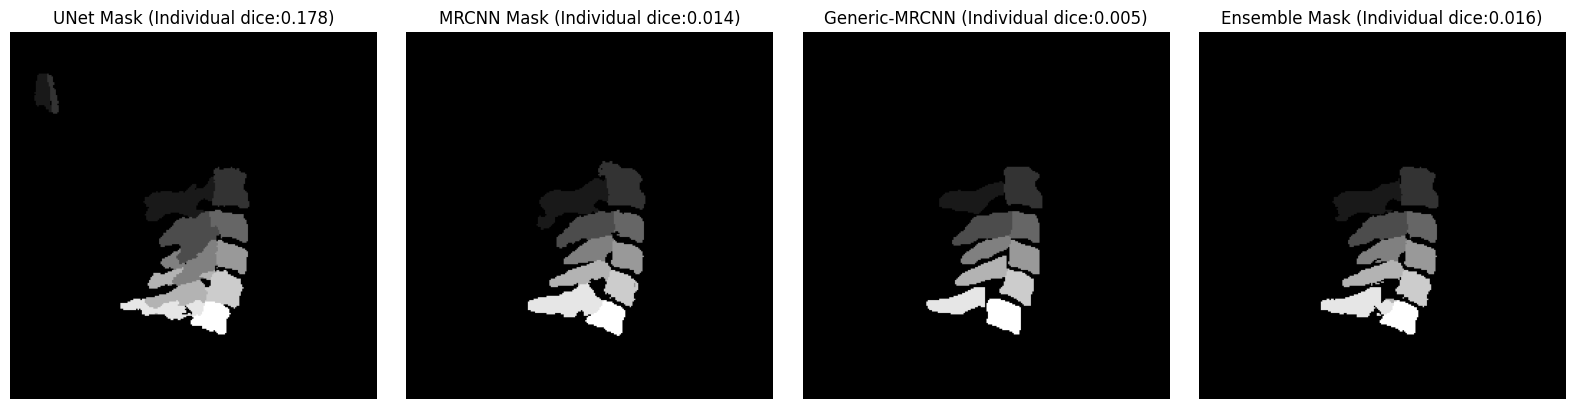

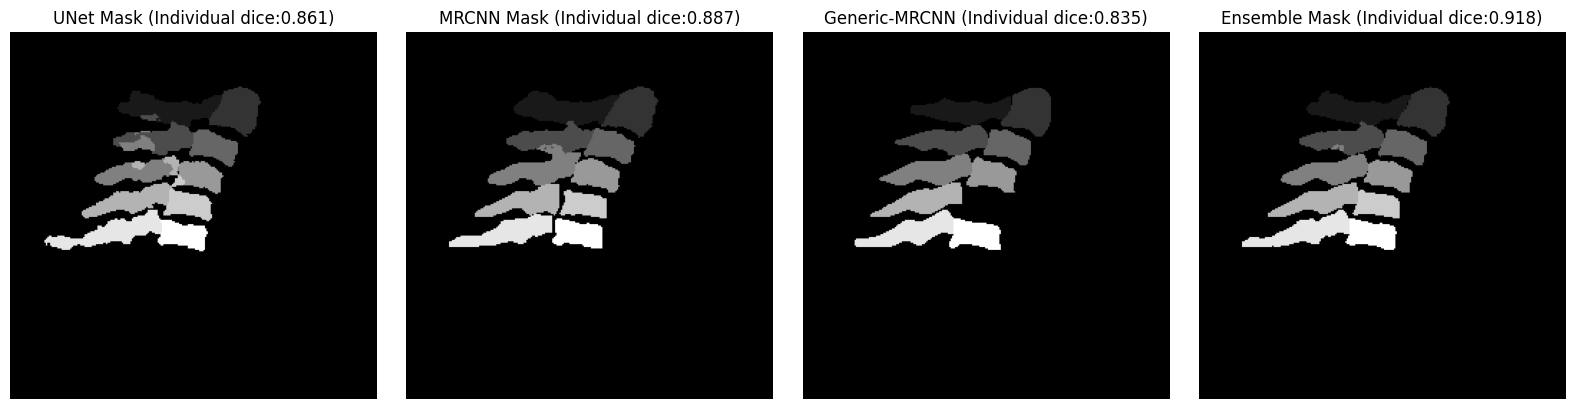

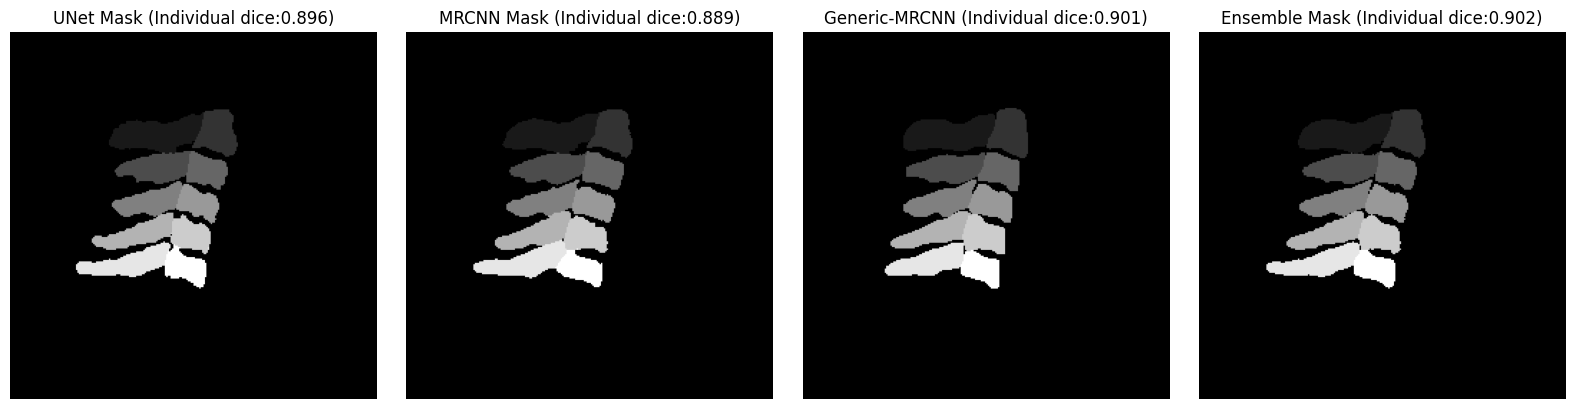

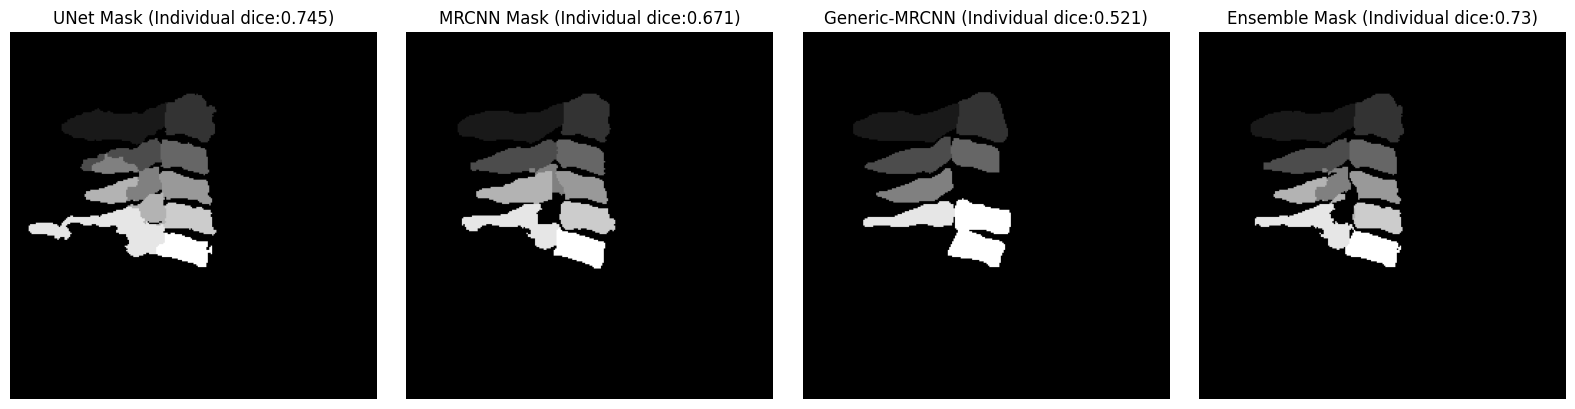

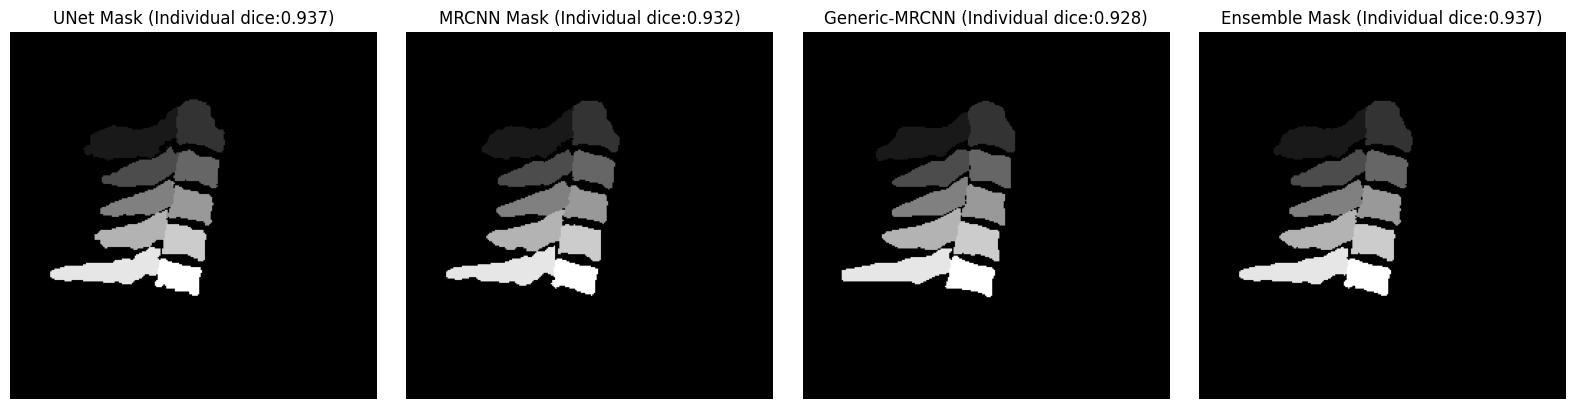

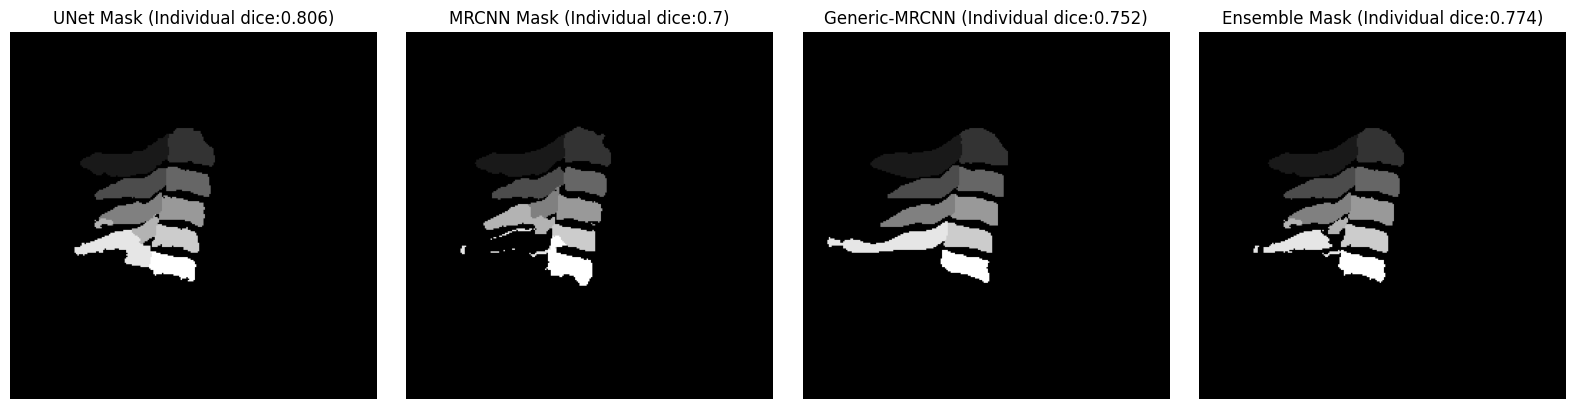

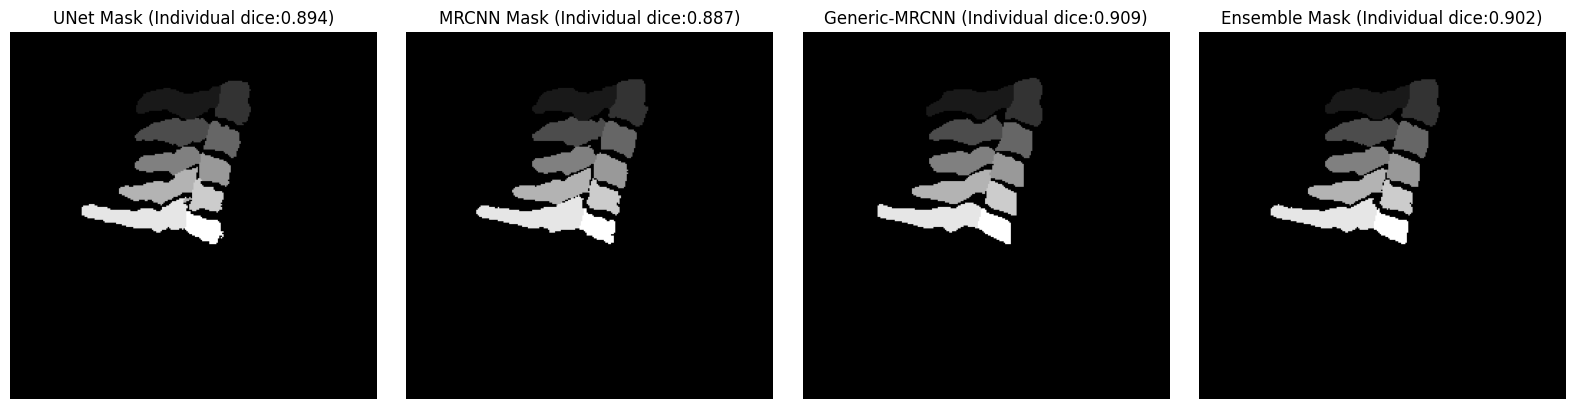

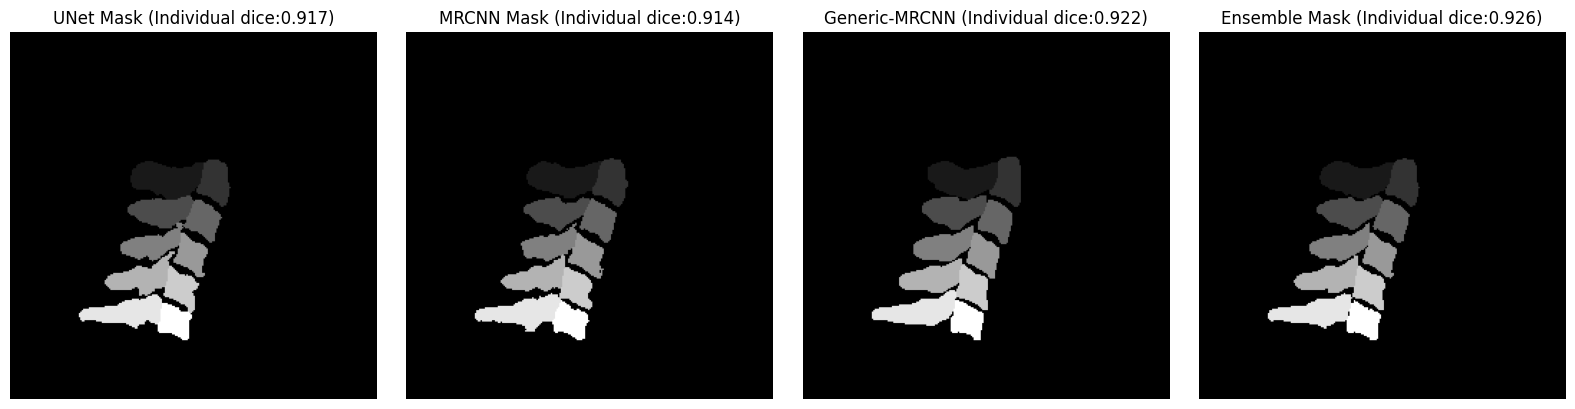

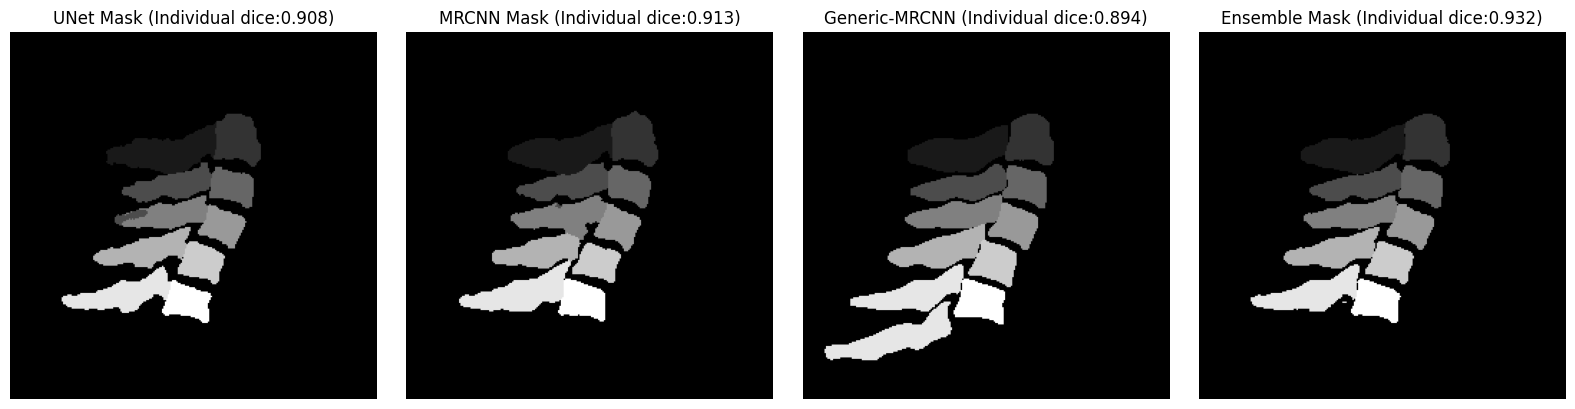

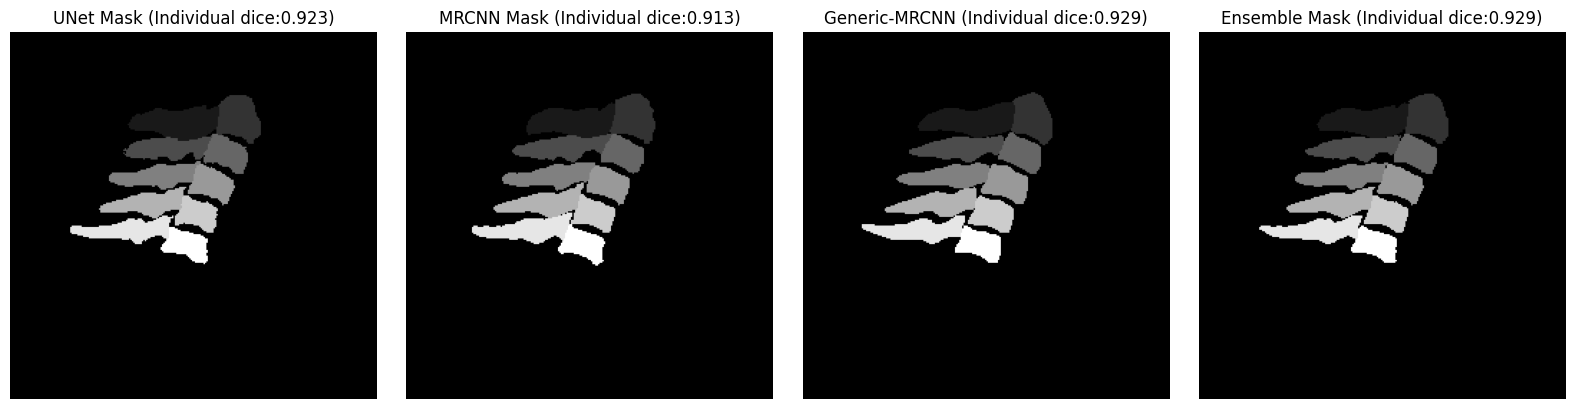

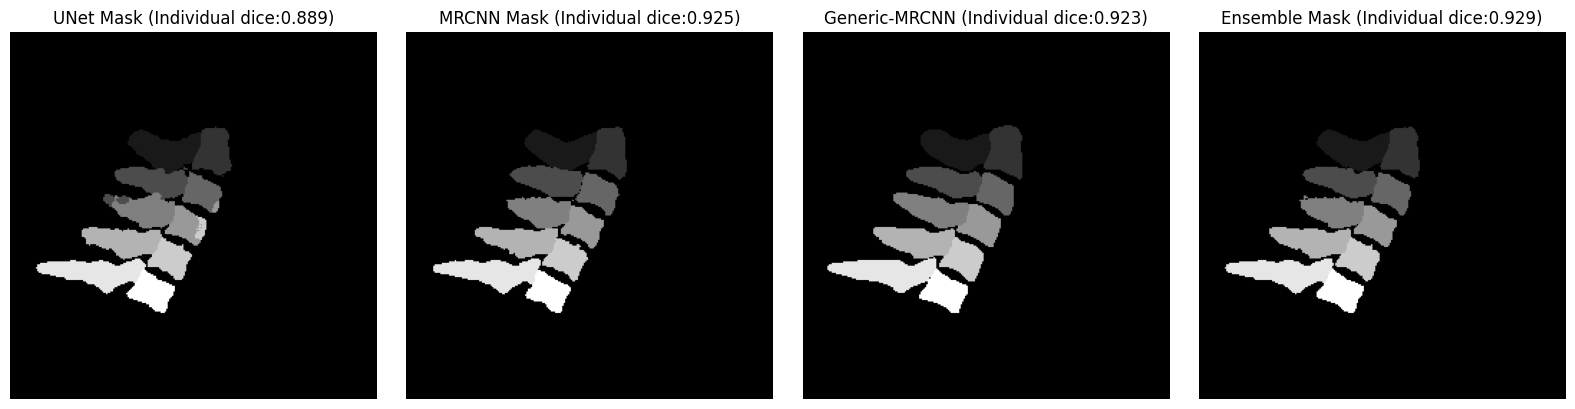

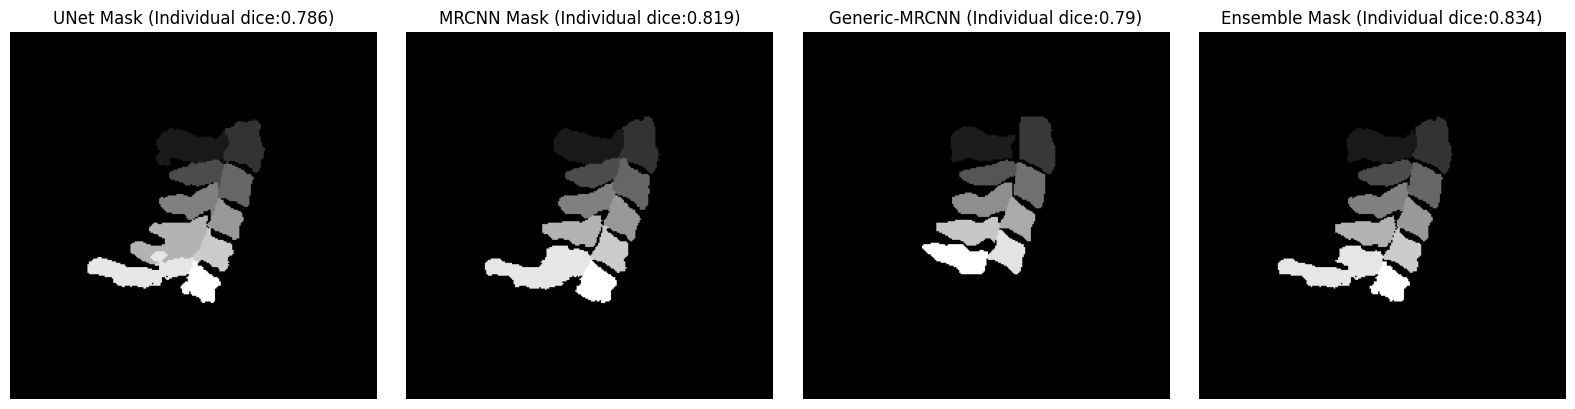

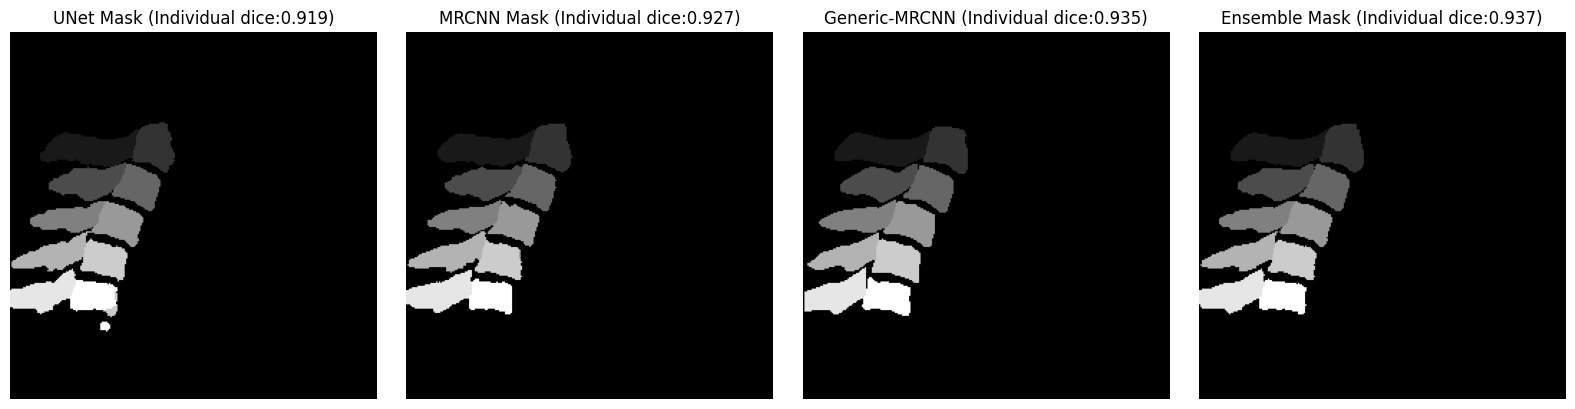

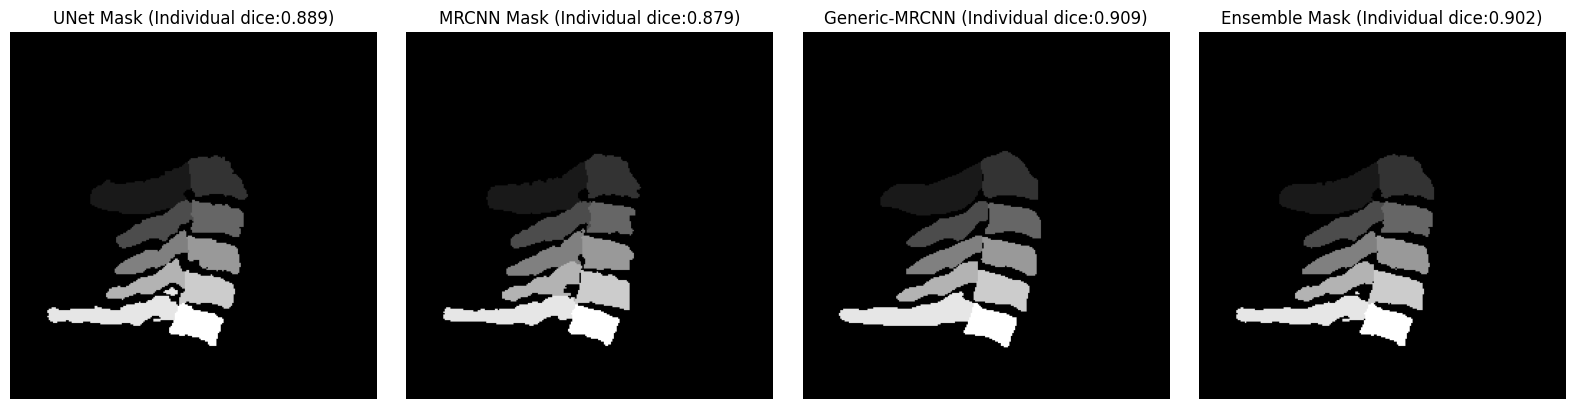

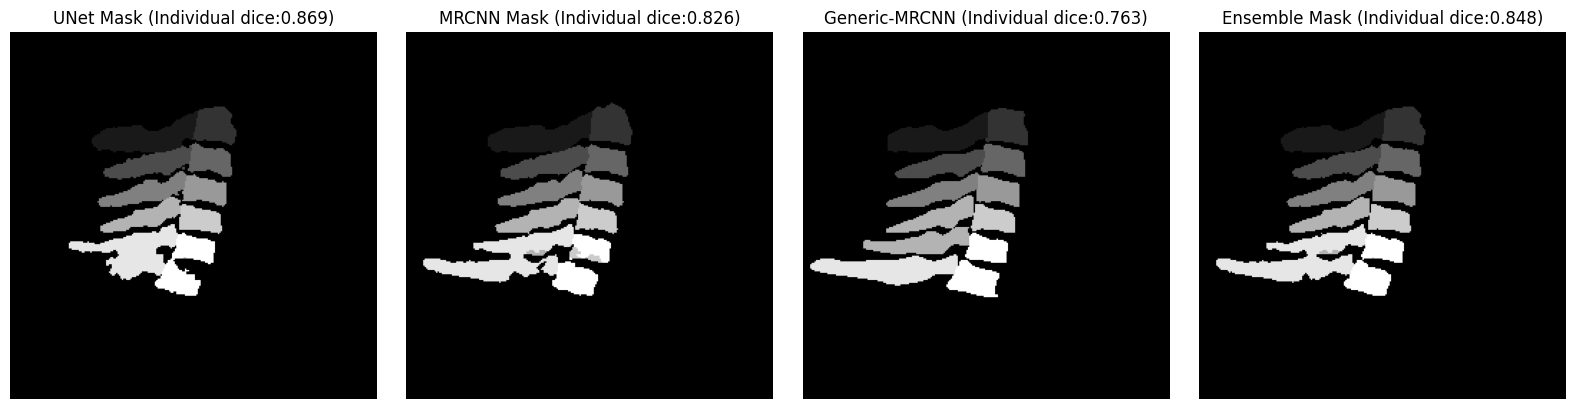

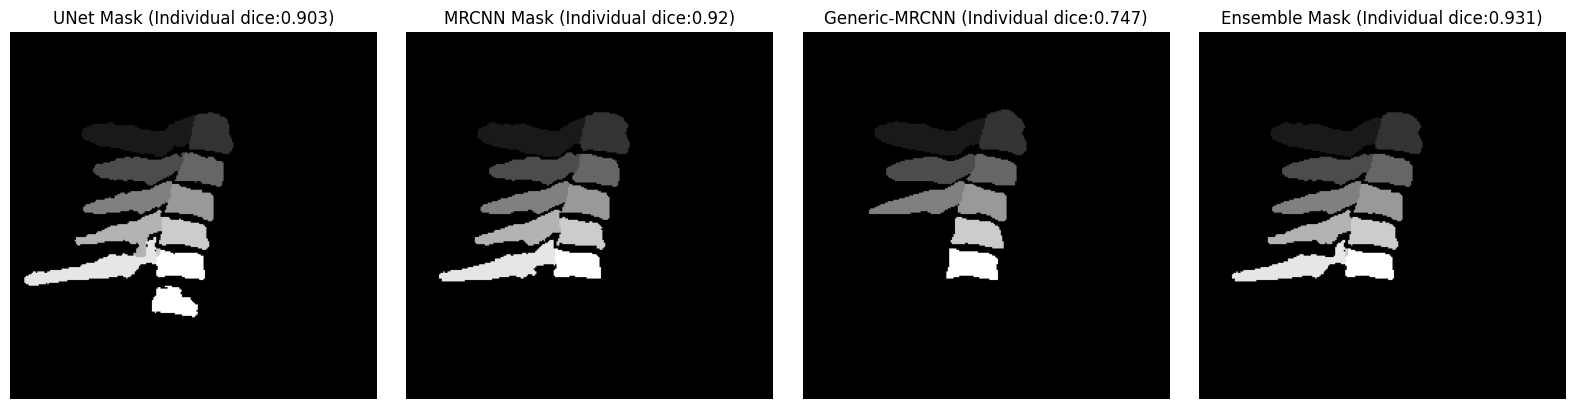

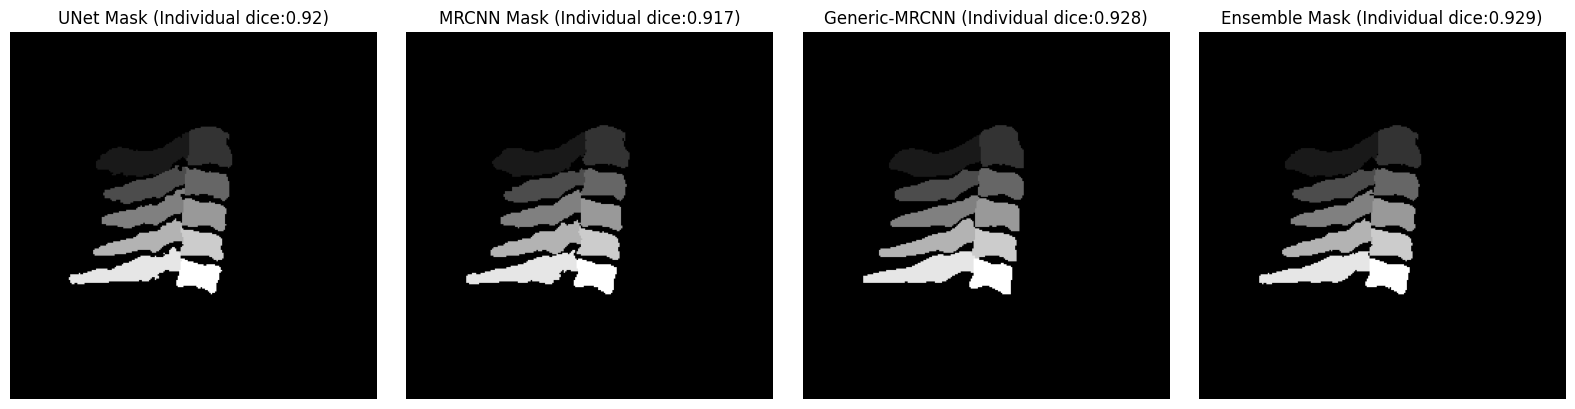

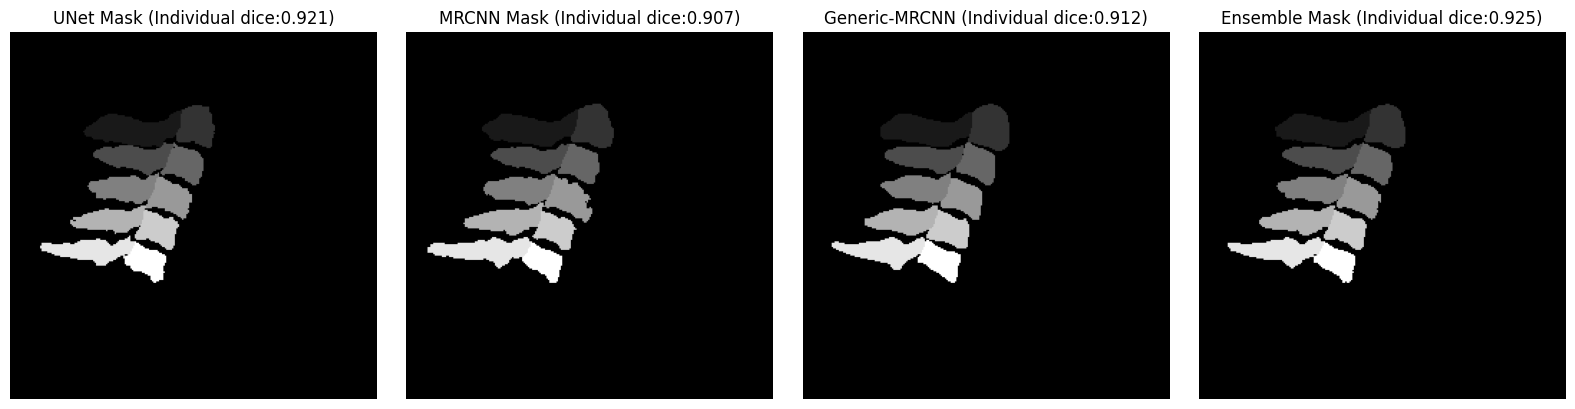

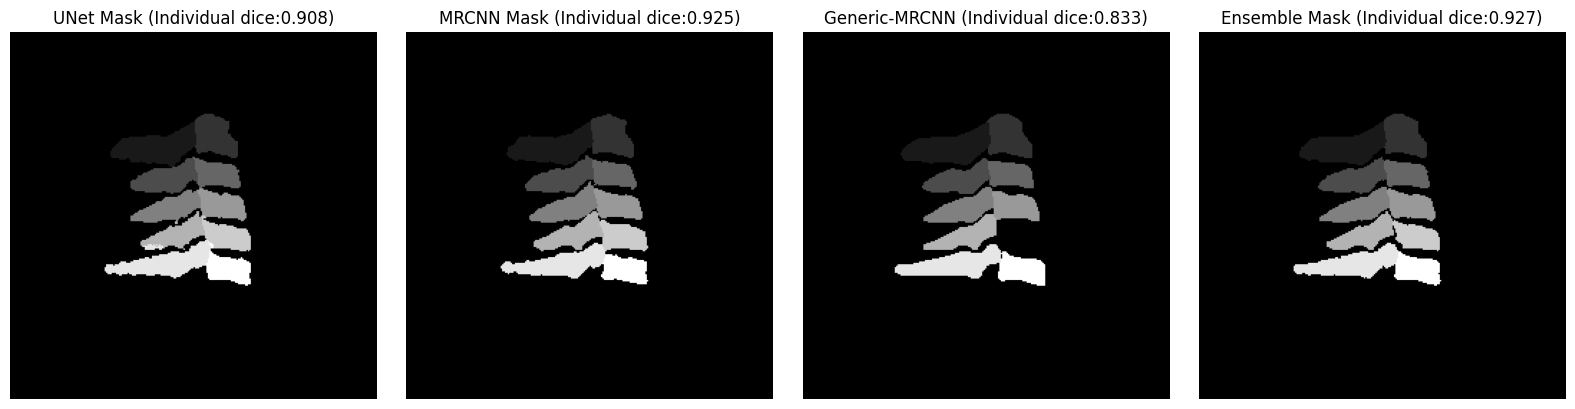

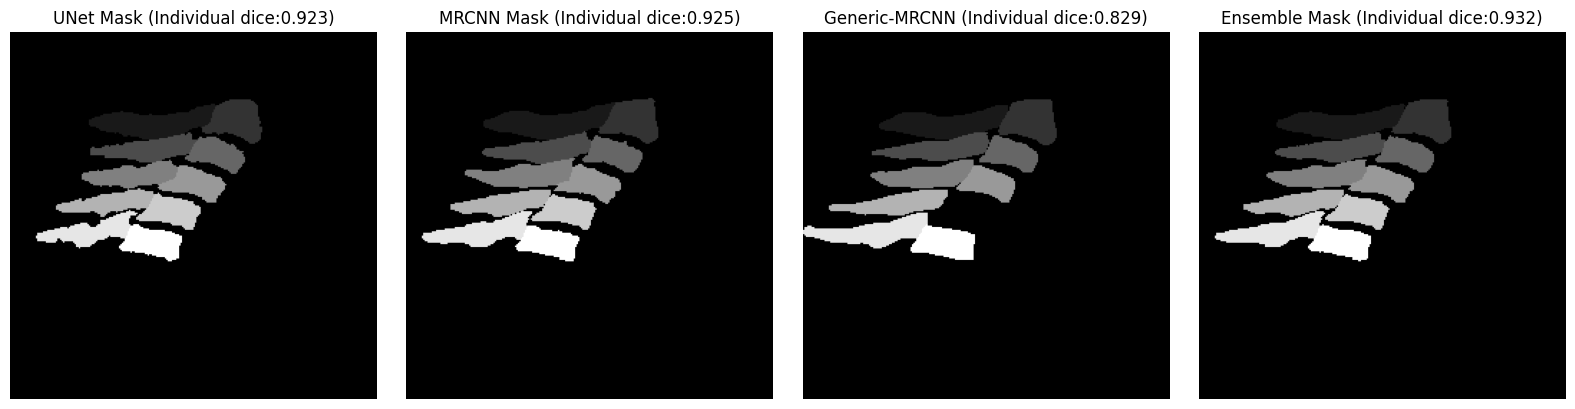

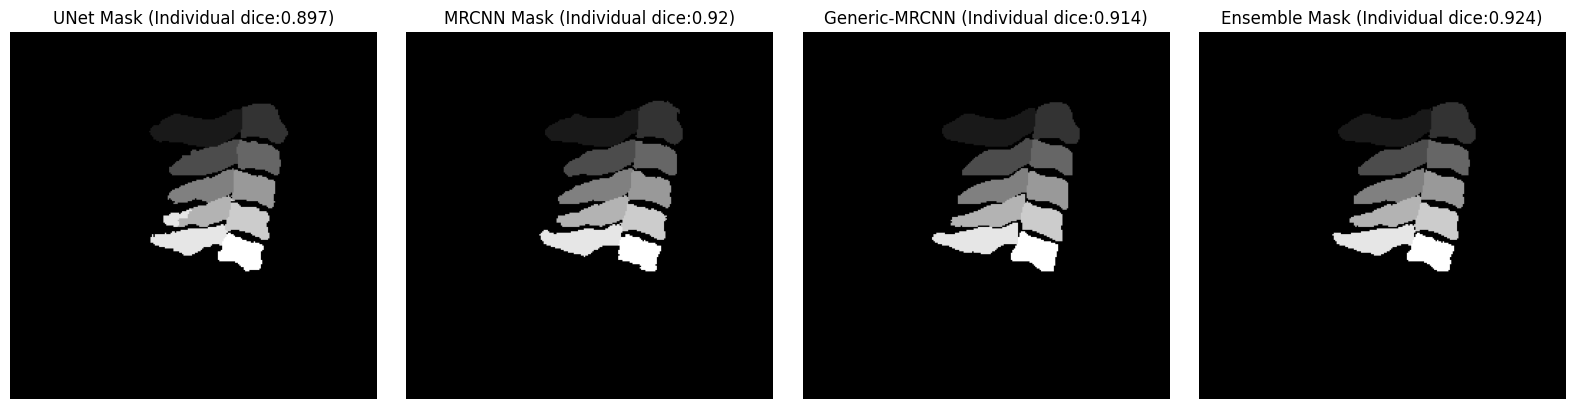

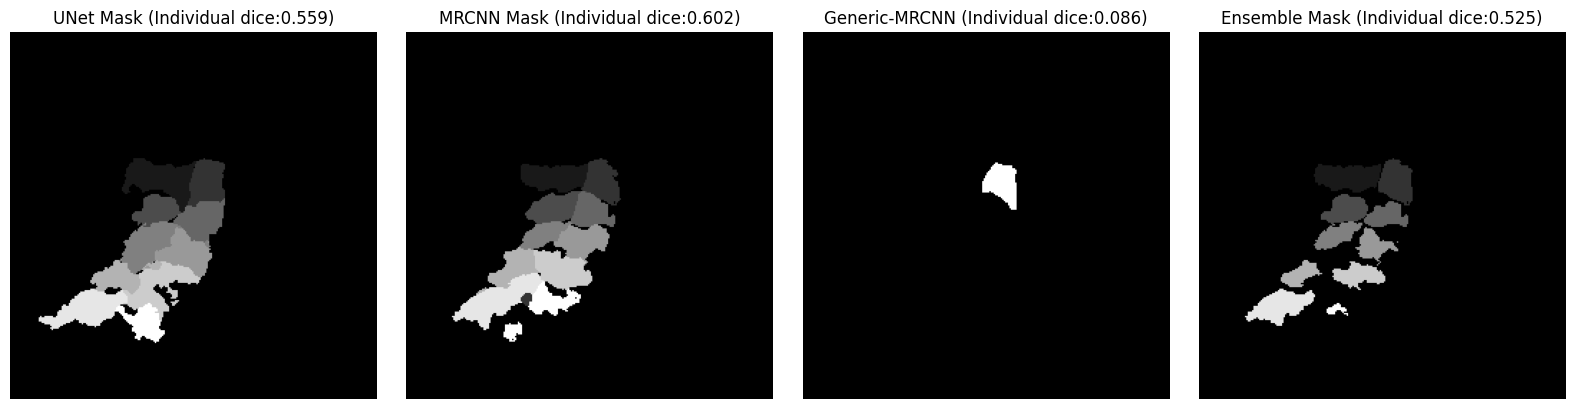

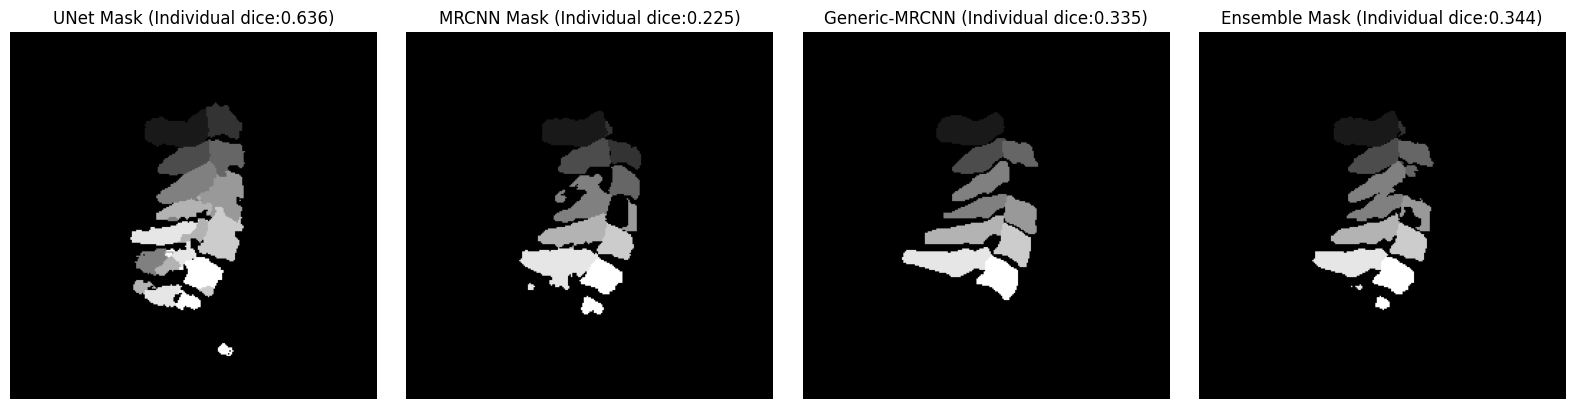

In [45]:
#4-6, 5-1, 4-1, 2-1, 1-4, 1-2, 2-10, 3-10, 5-3, 1-10, 4-3

#still error: 1-4, cuz of bad segmentations in the first place
# test_case = "N4-9"

# for i_fold, fold in enumerate(mcu_net_fn):
#     for index, fn in enumerate(fold):
#         if fn.startswith(test_case):
#             test_fold = i_fold
#             test_fn_index = index            

# print(mcu_net_fn[test_fold][test_fn_index])
# test_mask_unet = mcu_net_images[test_fold][test_fn_index]
# test_mask_unet = np.array(test_mask_unet)




# for i_fold, fold in enumerate(mrcnn_fn):
#     for index, fn in enumerate(fold):
#         if fn.startswith("Mask_RCNN_" + test_case):
#             test_fold = i_fold
#             test_fn_index = index            

# print(mrcnn_fn[test_fold][test_fn_index])
# test_mask_mrcnn = mrcnn_images[test_fold][test_fn_index]
# test_mask_mrcnn = np.array(test_mask_mrcnn)

# mcu_net_images.append(fold_mcunet)
# mcu_net_fn.append(fold_mcunet_fn)

# mrcnn_images.append(fold_mrcnn)
# mrcnn_fn.append(fold_mrcnn_fn)


print("************Ensemble************")

logic_gate = [0, 0, 0, 0, 0]


ensembled_masks = []
for index_fold, (fold_u, fold_m, fold_g) in enumerate(zip(mcu_net_images, mrcnn_images, gmrcnn_images)):
    combined_fold = []
    for index_file, (test_mask_unet, test_mask_mrcnn, test_mask_gmrcnn) in enumerate(zip(fold_u, fold_m, fold_g)):

        # if mcu_net_fn[index_fold][index_file] != 'N2-9.png':
        #     continue
        combined_mask = ensemble(test_mask_unet, test_mask_mrcnn, test_mask_gmrcnn)
        Dice_u = np.round(cal_DiceMulitpleAlt(test_mask_unet, [mcu_net_fn[index_fold][index_file][:-4]]), 3)
        Dice_m = np.round(cal_DiceMulitpleAlt(test_mask_mrcnn, [mcu_net_fn[index_fold][index_file][:-4]]), 3)
        Dice_gm = np.round(cal_DiceMulitpleAlt(test_mask_gmrcnn, [mcu_net_fn[index_fold][index_file][:-4]]), 3)
        Dice_ensemble = np.round(cal_DiceMulitpleAlt(combined_mask, [mcu_net_fn[index_fold][index_file][:-4]]), 3)
        
        fig, axes = plt.subplots(1, 4, figsize=(16, 4)) # figsize=(width, height) in inches

        # 2. Plot the first image
        axes[0].imshow(test_mask_unet, cmap='gray')
        axes[0].set_title(f'UNet Mask (Individual dice:{Dice_u[-1]})') # Caption for the first plot
        axes[0].axis('off') # Hide axis

        # 3. Plot the second image
        axes[1].imshow(test_mask_mrcnn, cmap='gray')
        axes[1].set_title(f'MRCNN Mask (Individual dice:{Dice_m[-1]})') # Caption for the second plot
        axes[1].axis('off') # Hide axis

        # 4. Plot the third image
        axes[2].imshow(test_mask_gmrcnn, cmap='gray')
        axes[2].set_title(f'Generic-MRCNN (Individual dice:{Dice_gm[-1]})') # Caption for the third plot
        axes[2].axis('off') # Hide axis
        
        # 4. Plot the third image
        axes[3].imshow(combined_mask, cmap='gray')
        axes[3].set_title(f'Ensemble Mask (Individual dice:{Dice_ensemble[-1]})') # Caption for the third plot
        axes[3].axis('off') # Hide axis

        # 5. Adjust layout to prevent titles from overlapping and display the plot
        plt.tight_layout()
        plt.show()
        
        combined_fold.append(combined_mask)
        
    ensembled_masks.append(combined_fold)

In [46]:
from pathlib import Path
for i in range(4):

    # Saving the crf enhanced images into crf dir

    # Create the crftestdir path
    ensemble_dir = dir_path + "fold" +str(i+1) + "/ensemble"
    # Convert to Path object for easier manipulation
    ensemble_path = Path(ensemble_dir)

    # Create the crf directory if it does not exist
    if not ensemble_path.exists():
        ensemble_path.mkdir(parents=True, exist_ok=True)
    refined_labels_case = ensembled_masks[i]
    refined_labels_fn = mcu_net_fn[i]
    # Convert the array to uint8 type if necessary
    for index, refined_label in enumerate(refined_labels_case):
        cv2.imwrite(str(ensemble_path / refined_labels_fn[index]), refined_label)


In [47]:
import pandas as pd
for i in range(4):
   ensemble_dir = dir_path + "fold" +str(i+1) + "/ensemble"

   ensemble_img_pre = []

      
   for fn in mcu_net_fn[i]:
      prefix = fn
      
      ensemble_img_pre.append(file_names_with_prefix(ensemble_dir, fn))
   
   ensemble_img_pre1d = [item for sublist in ensemble_img_pre for item in sublist]

   print(ensemble_img_pre1d)
   print(f"***Fold:{i}***")
   print("Ensemble results:")
   Dice = cal_DiceMulitple(ensemble_dir, ensemble_img_pre1d)
   df = pd.DataFrame(Dice)
   df = df.T
   df.to_csv(dir_path + "/EnsembleDice.csv", mode='a', header=False)



['N1-2', 'N1-4', 'N1-6', 'N2-1', 'N2-2', 'N3-2', 'N3-3', 'N3-9', 'N4-1', 'N4-6', 'N5-1', 'N5-6']
***Fold:0***
Ensemble results:
index =  0
予測画像: /home/eric/Desktop/majority_v_ensemble2/fold1/ensemble/N1-2.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-2.png
index =  1
予測画像: /home/eric/Desktop/majority_v_ensemble2/fold1/ensemble/N1-4.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-4.png
index =  2
予測画像: /home/eric/Desktop/majority_v_ensemble2/fold1/ensemble/N1-6.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-6.png
index =  3
予測画像: /home/eric/Desktop/majority_v_ensemble2/fold1/ensemble/N2-1.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N2-1.png
index =  4
予測画像: /home/eric/Desktop/majority_v_ensemble2/fold1/ensemble/N2-2.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N2-2.png
index =  5
予測画像: /home/eric/Desktop/majority_v_ensemble2/fold1/ensemble/N3-2.png
テストラベル

In [48]:
# print(prefix)
# print(ensemble_dir)
# print(type(prefix))

In [49]:
# print(mcu_net_fn)
# mcu_net_fn1d = [item for sublist in mcu_net_fn for item in sublist]
# print(mcu_net_fn1d)